# Pre-processing 20: Anime & Rating Data Preprocessing

This notebook implements the preprocessing pipeline for the Anime Recommendation System. It includes comprehensive data analysis, visualization (Before & After), and data transformation steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create images directory
os.makedirs('images', exist_ok=True)

# 1. Load Data & Before Analysis

In [2]:
# Load Data
anime_path = '../dataset/raw/anime.csv'
rating_path = '../dataset/raw/rating.csv'

print(f"Loading anime data from: {anime_path}")
anime_data = pd.read_csv(anime_path)
print(f"Loading rating data from: {rating_path}")
rating_data = pd.read_csv(rating_path)

# Display Basic Info
print("\n--- Anime Data Overview ---")
display(anime_data.head())
print(anime_data.info())
display(anime_data.describe(include='all'))

print("\n--- Rating Data Overview ---")
display(rating_data.head())
print(rating_data.info())
display(rating_data.describe(include='all'))

Loading anime data from: ../dataset/raw/anime.csv
Loading rating data from: ../dataset/raw/rating.csv

--- Anime Data Overview ---


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03



--- Rating Data Overview ---


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [3]:
# Statistics
print("\n--- Basic Statistics ---")
print(f"Anime Rows: {len(anime_data)}")
print(f"Rating Rows: {len(rating_data)}")
print(f"Anime Nulls:\n{anime_data.isnull().sum()}")
print(f"Rating Nulls:\n{rating_data.isnull().sum()}")

rating_minus_1_count = (rating_data['rating'] == -1).sum()
print(f"Rating = -1 Count: {rating_minus_1_count} ({rating_minus_1_count/len(rating_data)*100:.2f}%)")


--- Basic Statistics ---
Anime Rows: 12294
Rating Rows: 7813737
Anime Nulls:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
Rating Nulls:
user_id     0
anime_id    0
rating      0
dtype: int64
Rating = -1 Count: 1476496 (18.90%)


## Before Visualizations

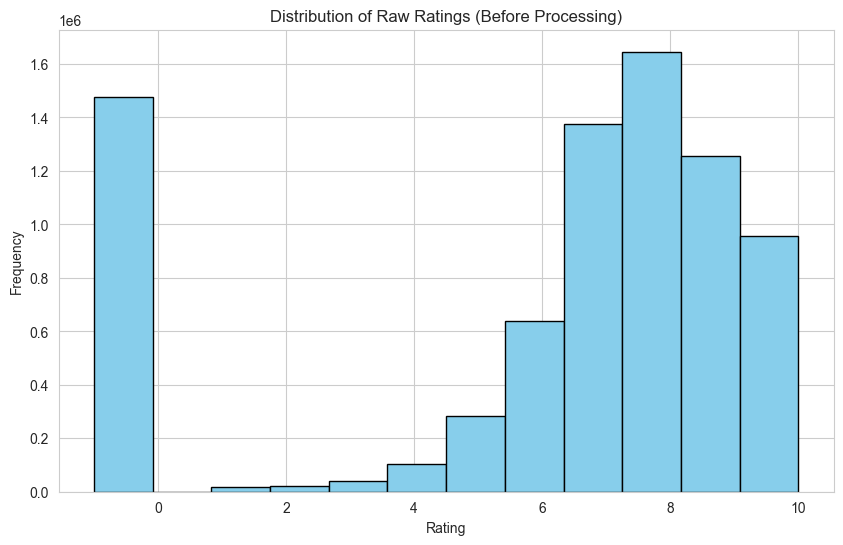

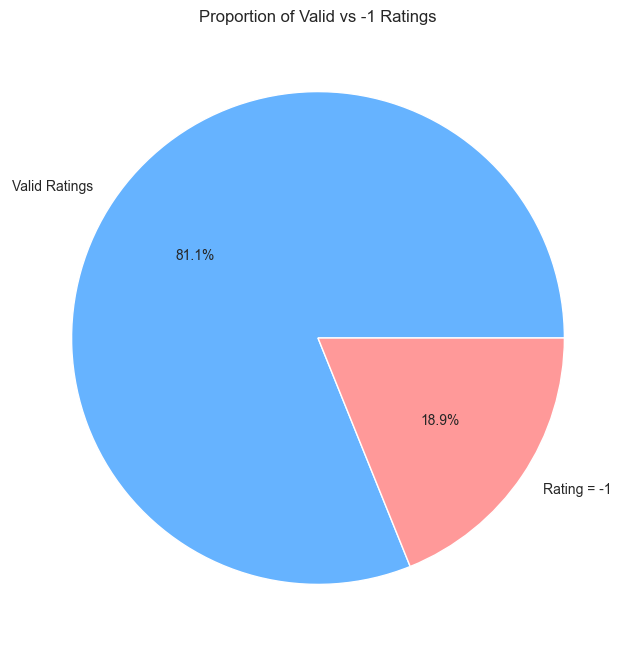

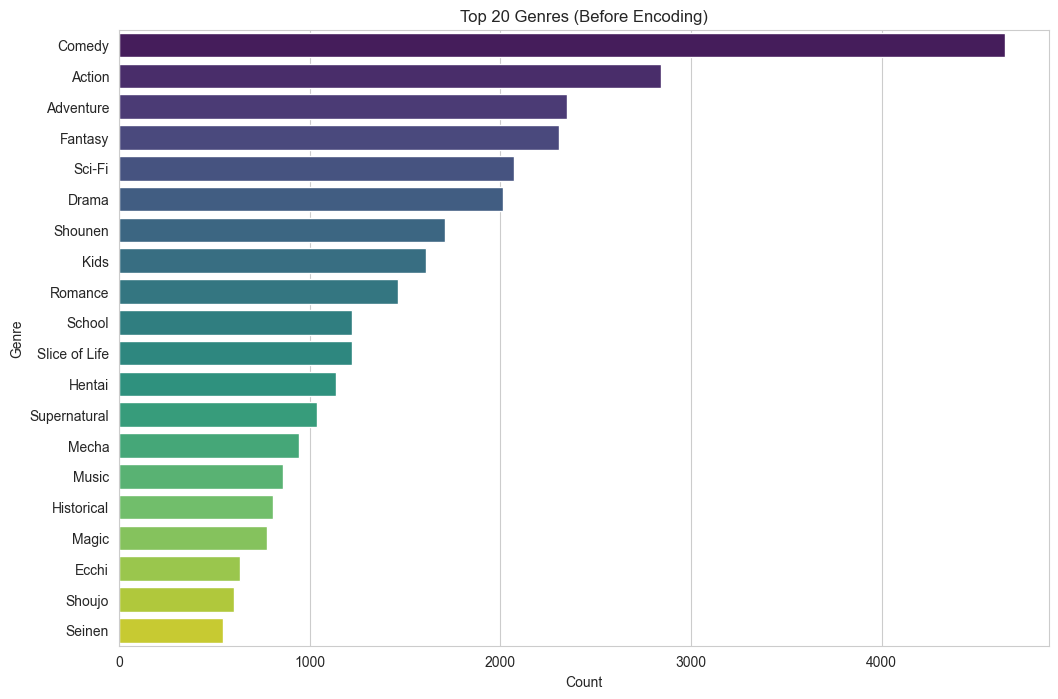

In [4]:
# Histogram rating raw
plt.figure(figsize=(10, 6))
plt.hist(rating_data['rating'], bins=12, color='skyblue', edgecolor='black')
plt.title('Distribution of Raw Ratings (Before Processing)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('images/before_rating_hist.png')
plt.show()

# Pie chart rating = -1 vs valid
valid_ratings = len(rating_data) - rating_minus_1_count
plt.figure(figsize=(8, 8))
plt.pie([valid_ratings, rating_minus_1_count], labels=['Valid Ratings', 'Rating = -1'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Valid vs -1 Ratings')
plt.savefig('images/before_rating_pie.png')
plt.show()

# Bar chart top genre before encoding
all_genres = []
for genres in anime_data['genre'].dropna():
    all_genres.extend([g.strip() for g in str(genres).split(',')])
genre_counts = pd.Series(all_genres).value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 20 Genres (Before Encoding)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('images/before_genre_bar.png')
plt.show()

# 2. Preprocessing (V19 Logic)

In [5]:
anime_cleaned = anime_data.copy()
rating_cleaned = rating_data.copy()

# 2.1 Handle Missing Values (Anime)
anime_cleaned['genre'] = anime_cleaned['genre'].fillna('Unknown')
anime_cleaned['type'] = anime_cleaned['type'].fillna('Unknown')
anime_cleaned['episodes'] = anime_cleaned['episodes'].replace('Unknown', '0')
anime_cleaned['episodes'] = pd.to_numeric(anime_cleaned['episodes'], errors='coerce').fillna(0).astype(int)

anime_cleaned['rating'] = pd.to_numeric(anime_cleaned['rating'], errors='coerce')
median_rating = anime_cleaned['rating'].median()
anime_cleaned['rating'].fillna(median_rating, inplace=True)

anime_cleaned['members'] = anime_cleaned['members'].fillna(0).astype(int)

print("Missing values handled.")

Missing values handled.


In [6]:
# 2.2 Genre Encoding (TF-IDF + KMeans)
print("Encoding Genres (KMeans)...")
genre_data = anime_cleaned[['anime_id', 'genre']].copy()
genre_data['genre_cleaned'] = genre_data['genre'].str.replace(',', ' ')

vectorizer = TfidfVectorizer()
X_genre = vectorizer.fit_transform(genre_data['genre_cleaned'])

k_genre = 10
kmeans_genre = KMeans(n_clusters=k_genre, random_state=42, n_init=10)
genre_data['genre_encoded'] = kmeans_genre.fit_predict(X_genre)

anime_cleaned = anime_cleaned.merge(genre_data[['anime_id', 'genre_encoded']], on='anime_id', how='left')

Encoding Genres (KMeans)...


In [7]:
# 2.3 Members Clustering
def encode_members(members):
    if members == 0: return 0
    elif 1 <= members <= 5000: return 1
    elif 5001 <= members <= 20000: return 2
    elif 20001 <= members <= 50000: return 3
    elif 50001 <= members <= 100000: return 4
    elif 100001 <= members <= 200000: return 5
    elif 200001 <= members <= 500000: return 6
    else: return 7

anime_cleaned['members_encoded'] = anime_cleaned['members'].apply(encode_members)

# 2.4 Anime Rating Clustering
def encode_rating(rating):
    if rating < 3.0: return 0
    elif 3.0 <= rating < 5.0: return 1
    elif 5.0 <= rating < 6.5: return 2
    elif 6.5 <= rating < 7.5: return 3
    elif 7.5 <= rating < 8.5: return 4
    elif 8.5 <= rating < 9.0: return 5
    else: return 6

anime_cleaned['anime_rating_encoded'] = anime_cleaned['rating'].apply(encode_rating)

# 2.5 Episodes Encoding
def encode_episodes(episodes):
    if episodes <= 1: return 'Movie/Special'
    elif 2 <= episodes <= 13: return 'Short_Series'
    elif 14 <= episodes <= 26: return 'Medium_Series'
    elif 27 <= episodes <= 100: return 'Long_Series'
    else: return 'Very_Long_Series'

anime_cleaned['episodes_encoded'] = anime_cleaned['episodes'].apply(encode_episodes)

# 2.6 User Rating Encoding
def encode_user_rating(rating):
    if rating == -1: return 0
    elif 1 <= rating <= 3: return 1
    elif 4 <= rating <= 5: return 2
    elif 6 <= rating <= 7: return 3
    elif 8 <= rating <= 9: return 4
    else: return 5

rating_cleaned['user_rating_encoded'] = rating_cleaned['rating'].apply(encode_user_rating)

# 2.7 Merge
print("Merging datasets...")
combined_cleaned = rating_cleaned.merge(
    anime_cleaned[['anime_id', 'genre_encoded', 'members_encoded', 'anime_rating_encoded', 'type', 'episodes_encoded']],
    on='anime_id',
    how='left'
)

Merging datasets...


# 3. After Analysis & Export

In [8]:
# Display Cleaned Info
print("\n--- Anime Cleaned Overview ---")
display(anime_cleaned.head())
print(anime_cleaned.info())

print("\n--- Rating Cleaned Overview ---")
display(rating_cleaned.head())
print(rating_cleaned.info())

print("\n--- Combined Overview ---")
display(combined_cleaned.head())
print(combined_cleaned.info())


--- Anime Cleaned Overview ---


,anime_id,name,genre,type,episodes,rating,members,genre_encoded,members_encoded,anime_rating_encoded,episodes_encoded
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4,6,6,Movie/Special
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9,7,6,Long_Series
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,2,5,6,Long_Series
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2,7,6,Medium_Series
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,2,5,6,Long_Series


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anime_id              12294 non-null  int64  
 1   name                  12294 non-null  object 
 2   genre                 12294 non-null  object 
 3   type                  12294 non-null  object 
 4   episodes              12294 non-null  int64  
 5   rating                12294 non-null  float64
 6   members               12294 non-null  int64  
 7   genre_encoded         12294 non-null  int32  
 8   members_encoded       12294 non-null  int64  
 9   anime_rating_encoded  12294 non-null  int64  
 10  episodes_encoded      12294 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 1008.6+ KB
None

--- Rating Cleaned Overview ---


,user_id,anime_id,rating,user_rating_encoded
0,1,20,-1,0
1,1,24,-1,0
2,1,79,-1,0
3,1,226,-1,0
4,1,241,-1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 4 columns):
 #   Column               Dtype
---  ------               -----
 0   user_id              int64
 1   anime_id             int64
 2   rating               int64
 3   user_rating_encoded  int64
dtypes: int64(4)
memory usage: 238.5 MB
None

--- Combined Overview ---


,user_id,anime_id,rating,user_rating_encoded,genre_encoded,members_encoded,anime_rating_encoded,type,episodes_encoded
0,1,20,-1,0,7.0,7.0,4.0,TV,Very_Long_Series
1,1,24,-1,0,7.0,5.0,4.0,TV,Medium_Series
2,1,79,-1,0,7.0,5.0,3.0,TV,Medium_Series
3,1,226,-1,0,7.0,7.0,4.0,TV,Short_Series
4,1,241,-1,0,7.0,4.0,3.0,TV,Short_Series


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_id               int64  
 1   anime_id              int64  
 2   rating                int64  
 3   user_rating_encoded   int64  
 4   genre_encoded         float64
 5   members_encoded       float64
 6   anime_rating_encoded  float64
 7   type                  object 
 8   episodes_encoded      object 
dtypes: float64(3), int64(4), object(2)
memory usage: 536.5+ MB
None


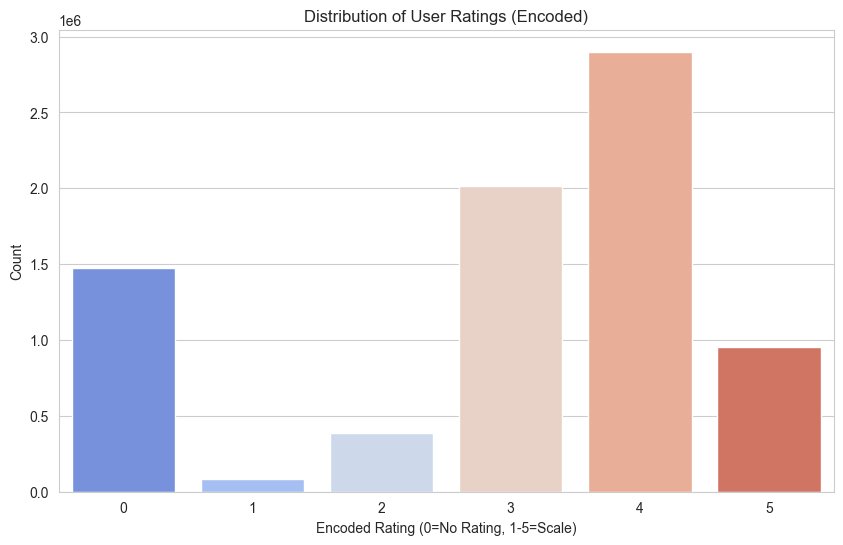

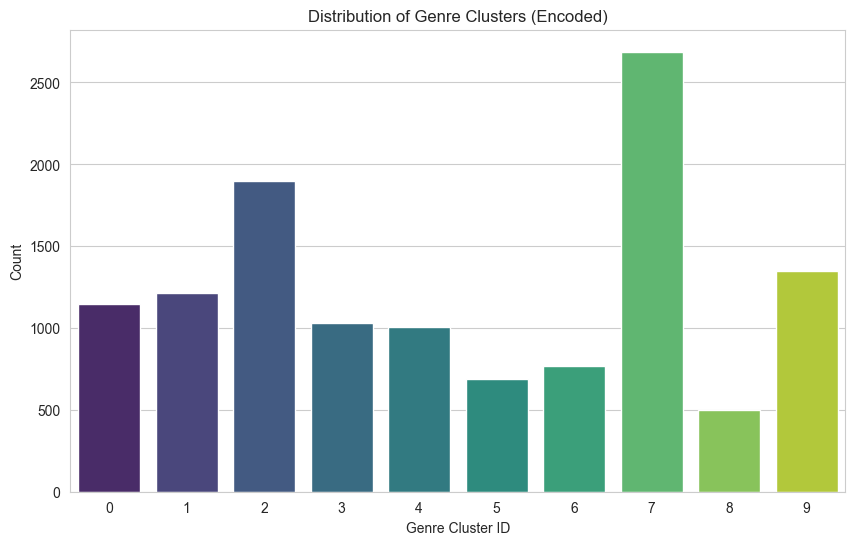

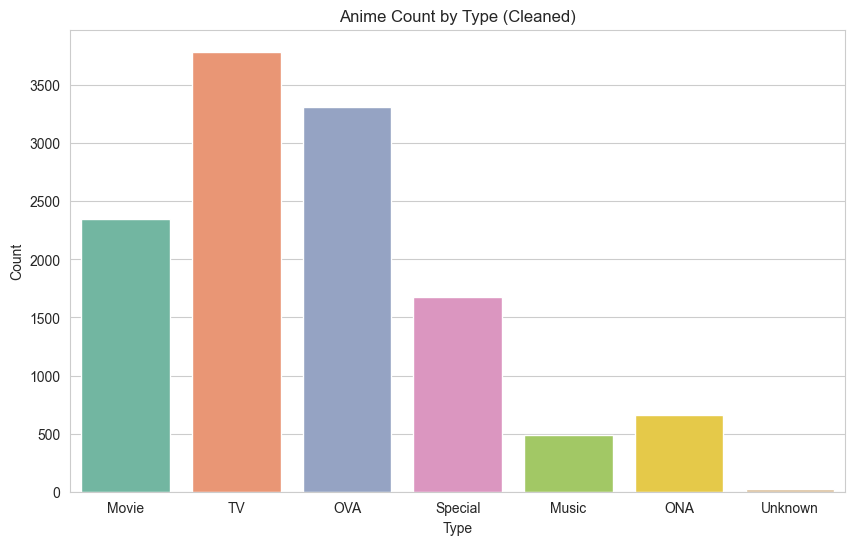

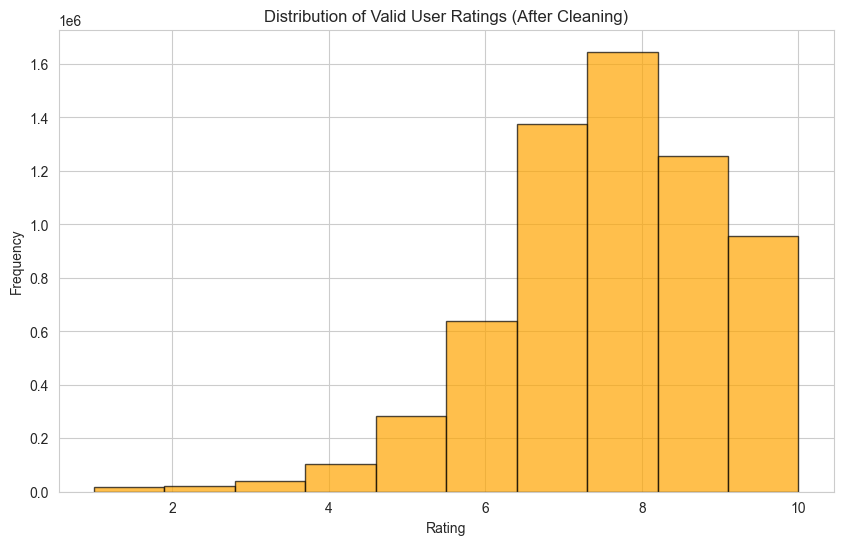

In [9]:
# Visualizations After

# Histogram rating_cleaned
plt.figure(figsize=(10, 6))
sns.countplot(x='user_rating_encoded', data=rating_cleaned, palette='coolwarm')
plt.title('Distribution of User Ratings (Encoded)')
plt.xlabel('Encoded Rating (0=No Rating, 1-5=Scale)')
plt.ylabel('Count')
plt.savefig('images/after_rating_hist.png')
plt.show()

# Bar chart genre encoded
plt.figure(figsize=(10, 6))
sns.countplot(x='genre_encoded', data=anime_cleaned, palette='viridis')
plt.title('Distribution of Genre Clusters (Encoded)')
plt.xlabel('Genre Cluster ID')
plt.ylabel('Count')
plt.savefig('images/after_genre_bar.png')
plt.show()

# Bar chart anime count after cleaning (by Type)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=anime_cleaned, palette='Set2')
plt.title('Anime Count by Type (Cleaned)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('images/after_anime_count.png')
plt.show()

# User rating distribution
plt.figure(figsize=(10, 6))
valid_user_ratings = rating_cleaned[rating_cleaned['rating'] != -1]['rating']
plt.hist(valid_user_ratings, bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Valid User Ratings (After Cleaning)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('images/after_user_rating_dist.png')
plt.show()

In [10]:
# Export CSV
print("\nExporting CSVs...")
anime_cleaned.to_csv('anime-cleaned.csv', index=False)
rating_cleaned.to_csv('rating-cleaned.csv', index=False)
combined_cleaned.to_csv('combined.csv', index=False)
print("CSVs exported.")


Exporting CSVs...
CSVs exported.


In [11]:
# Export ARFF
print("Exporting ARFFs...")

def create_arff_file(df, filename, relation_name, exclude_cols=[]):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"@relation {relation_name}\n\n")
        cols_to_write = [c for c in df.columns if c not in exclude_cols]
        for col in cols_to_write:
            if df[col].dtype == 'object':
                unique_vals = df[col].unique()
                escaped_vals = [str(v).replace("'", "\\'").replace('"', '\\"') for v in unique_vals if pd.notna(v)]
                if len(escaped_vals) > 500: escaped_vals = escaped_vals[:500]
                vals_str = ','.join([f"'{v}'" for v in escaped_vals])
                f.write(f"@attribute {col} {{{vals_str}}}\n")
            elif df[col].dtype in ['int64', 'int32']:
                unique_vals = sorted(df[col].unique())
                vals_str = ','.join([str(int(v)) for v in unique_vals if pd.notna(v)])
                f.write(f"@attribute {col} {{{vals_str}}}\n")
            elif df[col].dtype in ['float64', 'float32']:
                unique_vals = sorted(df[col].unique())
                vals_str = ','.join([f"{v:.2f}" for v in unique_vals if pd.notna(v)])
                f.write(f"@attribute {col} {{{vals_str}}}\n")
        f.write("\n@data\n")
        for _, row in df.iterrows():
            row_data = []
            for col in cols_to_write:
                val = row[col]
                if pd.isna(val): row_data.append('?')
                elif df[col].dtype == 'object':
                    escaped_val = str(val).replace("'", "\\'").replace('"', '\\"')
                    row_data.append(f"'{escaped_val}'")
                elif df[col].dtype in ['int64', 'int32']:
                    row_data.append(str(int(val)))
                elif df[col].dtype in ['float64', 'float32']:
                    row_data.append(f"{val:.2f}")
                else:
                    row_data.append(str(val))
            f.write(','.join(row_data) + '\n')
    print(f"Saved: {filename}")

create_arff_file(anime_cleaned, 'anime-cleaned.arff', 'anime_data')

# Sample for rating and combined to avoid huge files
rating_sample = rating_cleaned.sample(n=min(10000, len(rating_cleaned)), random_state=42)
create_arff_file(rating_sample, 'rating-cleaned.arff', 'rating_data')

combined_sample = combined_cleaned.sample(n=min(10000, len(combined_cleaned)), random_state=42)
cols_to_exclude = ['user_id', 'anime_id', 'rating']
create_arff_file(combined_sample, 'combined-cleaned.arff', 'combined_data', exclude_cols=cols_to_exclude)

print("\nProcessing Complete.")

Exporting ARFFs...
Saved: anime-cleaned.arff
Saved: rating-cleaned.arff
Saved: combined-cleaned.arff

Processing Complete.
